# suduko pdf export

In [43]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


# let's draw anything

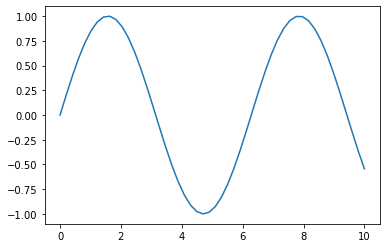

In [44]:
x=np.linspace(0,10)
plt.plot(x,np.sin(x));



# 2 subplots

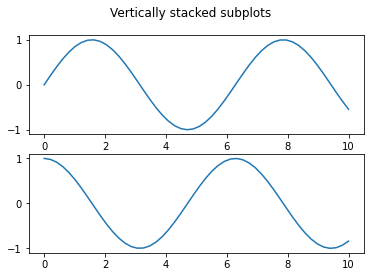

In [45]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, np.sin(x))
axs[1].plot(x, np.cos(x));


# draw lines in subplots


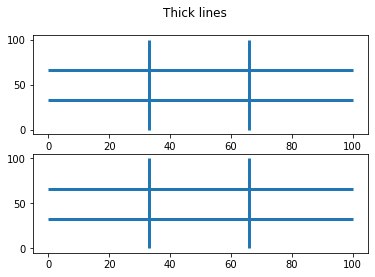

In [47]:
fig, axs = plt.subplots(2)
fig.suptitle('Thick lines')

axs[0].add_patch(matplotlib.patches.Rectangle((0,0), 100, 100, facecolor='none'))
axs[0].vlines(33,0,100,linewidth=3)
axs[0].vlines(66,0,100,linewidth=3)
axs[0].hlines(33,0,100,linewidth=3)
axs[0].hlines(66,0,100,linewidth=3)

axs[1].add_patch(matplotlib.patches.Rectangle((0,0), 100, 100, facecolor='none'))
axs[1].vlines(33,0,100,linewidth=3)
axs[1].vlines(66,0,100,linewidth=3)
axs[1].hlines(33,0,100,linewidth=3)
axs[1].hlines(66,0,100,linewidth=3)

plt.show()

# entire thick+thin grid using loops in a function

In [50]:
[ round(i*(1/20),2) for i in [1,2,3,4,5]]

[0.05, 0.1, 0.15, 0.2, 0.25]

In [51]:

def makeGrid(axis, scale=1.0):
    axs[0].add_patch(matplotlib.patches.Rectangle((0,0), 100, 100, facecolor='none'))
    l3 = [ round(100*i/3,2) for i in (1,2) ]
    l1 = [ round(100*i/9,2) for i in (1,2,4,5,7,8) ]
    
    max = int(100*scale)
    l3 = [ round(x*scale,2) for x in l3 ]
    l1 = [ round(x*scale,2) for x in l1 ]

    axis.add_patch(matplotlib.patches.Rectangle((0,0), 100, 100, facecolor='none'))
    axis.add_patch(matplotlib.patches.Rectangle((0,0), max, max, facecolor='none',ec='C0', ls='-'))

    for pct in l3:
        axis.vlines(pct,0,max,linewidth=3)
        axis.hlines(pct,0,max,linewidth=3)
    for pct in l1:
        axis.vlines(pct,0,max,linewidth=1)
        axis.hlines(pct,0,max,linewidth=1)



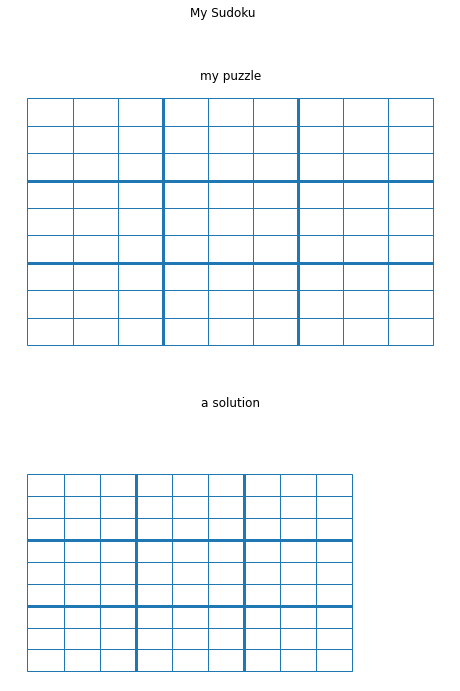

In [52]:
fig, axs = plt.subplots(2,figsize=(8, 11))
fig.suptitle('My Sudoku')

axs[0].axis('off')
axs[0].set_title('my puzzle')
makeGrid(axs[0])

axs[1].axis('off')
axs[1].set_title('a solution')
makeGrid(axs[1], 0.8)

plt.show()



# export to 1-page pdf!

In [53]:
fname = 'my-sudoku.pdf'
fig.savefig(fname)

# insert 1 number 

cell #32 = x,y = col,row = (5, 3) -- all 0-based


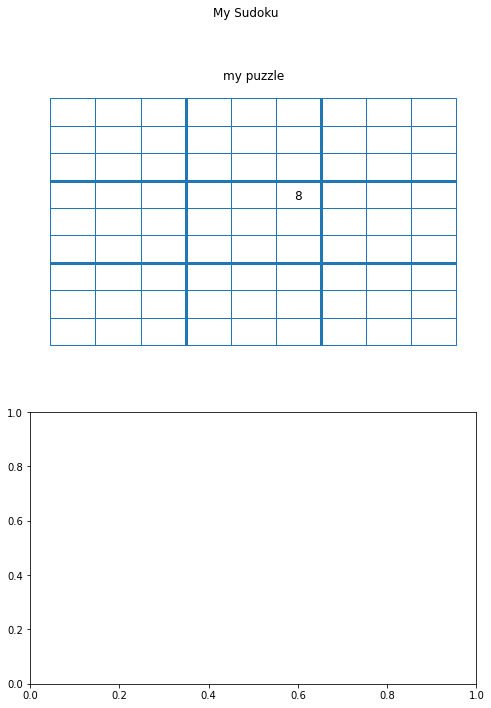

In [64]:
fig, axs = plt.subplots(2,figsize=(8, 11))
fig.suptitle('My Sudoku')

axs[0].axis('off')
axs[0].set_title('my puzzle')
makeGrid(axs[0])

cell = 32
cellxy = (32%9,int(32/9))  #  x,y = col,row 
print(f"cell #{cell} = x,y = col,row = {cellxy} -- all 0-based")

offset = round(100*1/18,2)
multiple = round(100*1/9,1)
yt = round((8-cellxy[1])*multiple+offset,2)-2
xt = round(cellxy[0]*multiple+offset,2)-1
axs[0].text(xt,yt,'8', fontsize='large')

plt.show()


# insert whole board

In [85]:
board = [
 [8, 0, 0, 0, 1, 0, 0, 0, 9],
 [0, 5, 0, 8, 0, 7, 0, 1, 0],
 [0, 0, 4, 0, 9, 0, 7, 0, 0],
 [0, 6, 0, 7, 0, 1, 0, 2, 0],
 [5, 0, 8, 0, 6, 0, 1, 0, 7],
 [0, 1, 0, 5, 0, 2, 0, 9, 0],
 [0, 0, 7, 0, 4, 0, 6, 0, 0],
 [0, 8, 0, 3, 0, 9, 0, 4, 0],
 [3, 0, 0, 0, 5, 0, 0, 0, 8]]

print(board)

def board2Str(board):
    "given a 9x9 array, convert to 81 characters 0..9"
    boardStr = ""
    for rows in board:
        for c in rows:
            boardStr += str(c)
    return boardStr

boardStr = board2Str(board)
print(boardStr)



[[8, 0, 0, 0, 1, 0, 0, 0, 9], [0, 5, 0, 8, 0, 7, 0, 1, 0], [0, 0, 4, 0, 9, 0, 7, 0, 0], [0, 6, 0, 7, 0, 1, 0, 2, 0], [5, 0, 8, 0, 6, 0, 1, 0, 7], [0, 1, 0, 5, 0, 2, 0, 9, 0], [0, 0, 7, 0, 4, 0, 6, 0, 0], [0, 8, 0, 3, 0, 9, 0, 4, 0], [3, 0, 0, 0, 5, 0, 0, 0, 8]]
800010009050807010004090700060701020508060107010502090007040600080309040300050008


In [91]:
# -------------------------------------------------------
#  popualate boards with specifics to this game
# -------------------------------------------------------

def cellNumtoPDFxy(cellNum):
    "given a cell number (0 to 80), return the x,y position to then insert/draw the number"
    
    cellx = cellNum%9        # col - remainder of a group
    celly = int(cellNum/9)   # row - the group number 
    #print(f"cell #{cellNum} = x,y = col,row = {cellx},{celly} -- all 0-based")

    # grid calculations 
    offset = round(100*1/18,2)
    multiple = round(100*1/9,1)
    yt = round((8-celly)*multiple+offset,2)-2   # cells count top-down, but plt is (0,0) at bottom-up
    xt = round(cellx*multiple+offset,2)-1       # both L-to-R

    return (xt,yt)


def insertBoard(axis, boardStr, scale=1.0):
    "given a 81-char string of a 9x9 board, insert all numbers"
    
    for cellNum in range(len(boardStr)):
        value = boardStr[cellNum]
        if value == '0': continue
        (xt,yt) = cellNumtoPDFxy(cellNum)
        #print(f"cellNum={cellNum},  xt={xt}, yt={yt} (non-scale)")
        
        # scale 
        xt = round(xt*scale, 2)
        yt = round(yt*scale, 2)

        axis.text(xt,yt, value, fontsize='large')



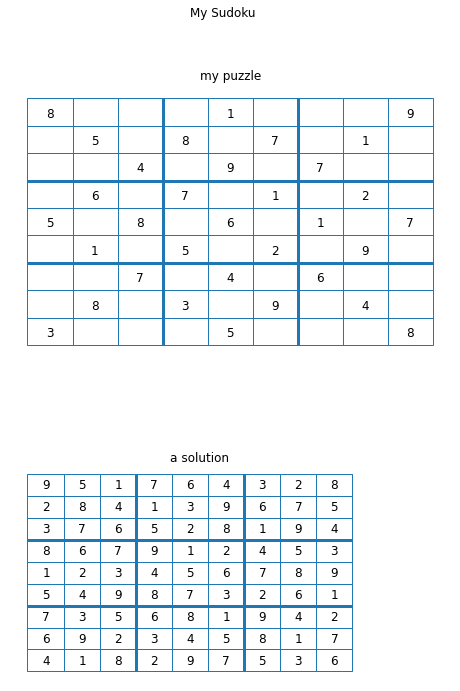

In [101]:
fig, axs = plt.subplots(2,figsize=(8, 11))
fig.suptitle('My Sudoku')

axs[0].axis('off')
axs[0].set_title('my puzzle')
makeGrid(axs[0])

insertBoard(axs[0], boardStr)


axs[1].axis('off')
#axs[1].set_title('a solution')
axs[1].text(35, 85, 'a solution', fontsize='large')  # at top of 80% scale
makeGrid(axs[1], 0.8)

# solution set comes as 81-char string
ss = '951764328284139675376528194867912453123456789549873261735681942692345817418297536'
insertBoard(axs[1], ss, scale=0.8)


